<a href="https://colab.research.google.com/github/yoga3311/Fracture-Detection-Model/blob/main/Fracture_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

NAME: YOGA NARASIMMAN S

REG NO: 727822TUAM063

CLASS: AIML

**FRACTURE DETECTION MODEL**

Upload your ZIP file containing 'fractured' and 'normal' folders...


Saving fracture_dataset.zip to fracture_dataset.zip
Dataset extracted successfully!
Found 32 images belonging to 1 classes.
Found 8 images belonging to 1 classes.
Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 15s 15s/step - accuracy: 0.4375 - loss: 0.6951 - val_accuracy: 1.0000 - val_loss: 0.5343
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.8750 - loss: 0.5688 - val_accuracy: 1.0000 - val_loss: 0.3992
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.3478 - val_accuracy: 1.0000 - val_loss: 0.2966
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 1.0000 - loss: 0.2964 - val_accuracy: 1.0000 - val_loss: 0.2182
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 1.0000 - loss: 0.2307 - val_accuracy: 1.0000 - val_loss: 0.1671
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 428ms/step - accuracy: 1.0000 - loss: 0.1675


Test Accuracy: 1.00
Model saved successfully!


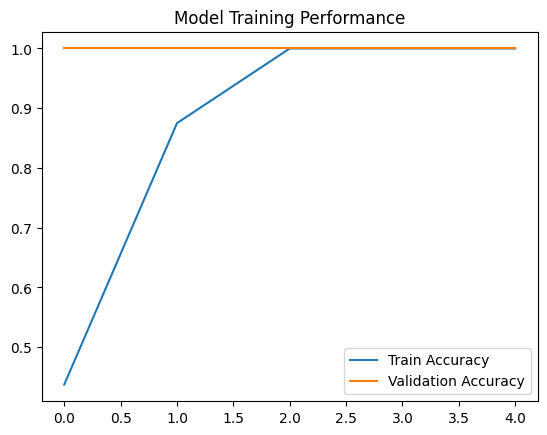

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import zipfile
import os
from google.colab import files
from tensorflow.keras.preprocessing.image import ImageDataGenerator

print("Upload your ZIP file containing 'fractured' and 'normal' folders...")
uploaded = files.upload()

zip_file = next(iter(uploaded))
extract_folder = "/content/dataset"

with zipfile.ZipFile(zip_file, 'r') as zip_ref:
    zip_ref.extractall(extract_folder)

print("Dataset extracted successfully!")

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = train_datagen.flow_from_directory(
    extract_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

val_generator = train_datagen.flow_from_directory(
    extract_folder,
    target_size=(128, 128),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(train_generator, validation_data=val_generator, epochs=5)

loss, acc = model.evaluate(val_generator)
print(f"Test Accuracy: {acc:.2f}")

model.save("/content/fracture_detection_model.h5")
print("Model saved successfully!")

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Training Performance")
plt.show()


Saving 93-rotated3-rotated3-rotated2.jpg to 93-rotated3-rotated3-rotated2.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


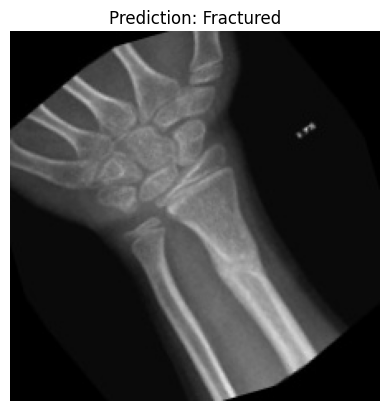

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import cv2
from google.colab import files

base_model = keras.applications.ResNet50(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

uploaded = files.upload()

for filename in uploaded.keys():

    img_path = filename
    img = image.load_img(img_path, target_size=(128, 128))
    img_array = image.img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)

    prediction = model.predict(img_array)[0][0]
    result = "Fractured" if prediction > 0.5 else "Normal"

    plt.imshow(cv2.imread(img_path))
    plt.title(f"Prediction: {result}")
    plt.axis('off')
    plt.show()
